# **Gathering Data**

# **PREPOCESSING**

EDA COMBINED DATA

In [ ]:
pip install tensorflowjs

  Using cached tensorflowjs-4.22.0-py3-none-any.whl.metadata (3.2 kB)
  Using cached tensorflow_decision_forests-1.11.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.0 kB)
INFO: pip is looking at multiple versions of tf-keras to determine which version is compatible with other requirements. This could take a while.
  Using cached tf_keras-2.18.0-py3-none-any.whl.metadata (1.6 kB)
Using cached tensorflowjs-4.22.0-py3-none-any.whl (89 kB)
Using cached tensorflow_decision_forests-1.11.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (15.9 MB)
Using cached tf_keras-2.18.0-py3-none-any.whl (1.7 MB)
  Attempting uninstall: tf-keras
    Found existing installation: tf_keras 2.17.0
    Uninstalling tf_keras-2.17.0:
      Successfully uninstalled tf_keras-2.17.0


In [ ]:
import os
import pandas as pd
import numpy as np
import keras
import matplotlib.pyplot as plt


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import TensorBoard,EarlyStopping

import sklearn.metrics as metrics
from keras.callbacks import LearningRateScheduler
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


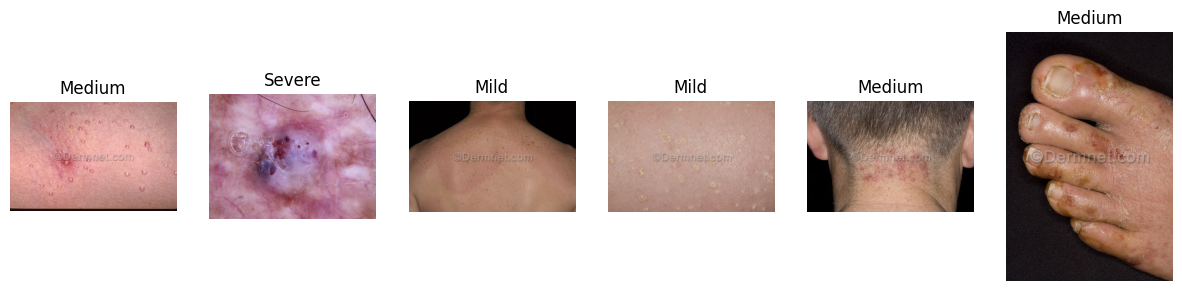

<ipython-input-23-af2a033442df>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()), palette='viridis')


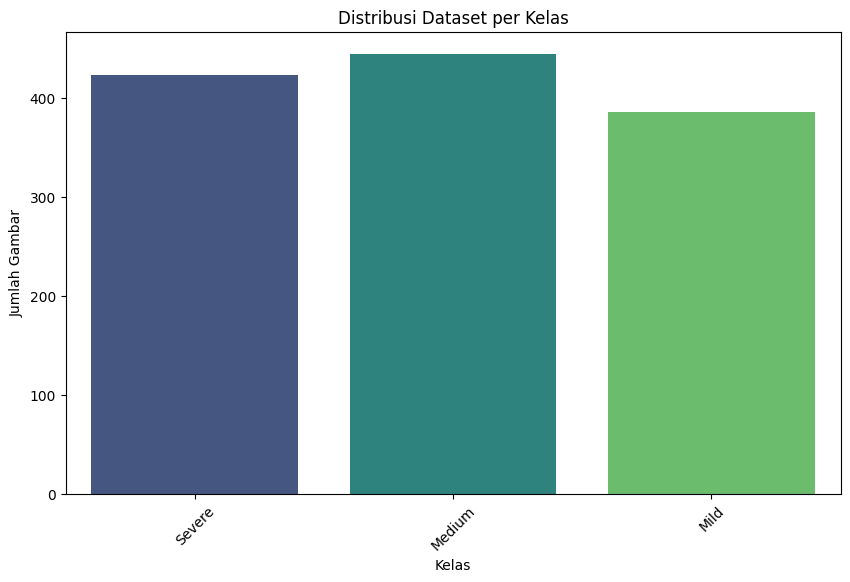

In [ ]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import random

# Path ke folder combined_set
combined_dir = "/content/drive/MyDrive/tingkat-keparahan"

# Mendapatkan daftar kelas (folder dalam combined_set)
classes = [d for d in os.listdir(combined_dir) if os.path.isdir(os.path.join(combined_dir, d))]

# Menghitung jumlah gambar di setiap kelas
class_counts = {}
for class_name in classes:
    class_folder = os.path.join(combined_dir, class_name)
    class_counts[class_name] = len(os.listdir(class_folder))

# Menampilkan beberapa gambar secara acak
def display_random_images(combined_dir, classes, num_images=6):
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    for i in range(num_images):
        # Pilih kelas dan gambar secara acak
        class_name = random.choice(classes)
        class_folder = os.path.join(combined_dir, class_name)
        image_name = random.choice(os.listdir(class_folder))
        image_path = os.path.join(class_folder, image_name)

        # Buka dan tampilkan gambar
        img = Image.open(image_path)
        axes[i].imshow(img)
        axes[i].axis('off')
        axes[i].set_title(class_name)
    plt.show()

# Menampilkan distribusi kelas
def plot_class_distribution(class_counts):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()), palette='viridis')
    plt.title('Distribusi Dataset per Kelas')
    plt.xlabel('Kelas')
    plt.ylabel('Jumlah Gambar')
    plt.xticks(rotation=45)
    plt.show()

# Menjalankan fungsi untuk EDA
display_random_images(combined_dir, classes)
plot_class_distribution(class_counts)


Cek size gambar

In [ ]:
import os
from PIL import Image

# Path ke folder combined_set
combined_dir = "/content/drive/MyDrive/tingkat-keparahan"

# Ukuran yang diharapkan (misalnya 224x224)
expected_size = (224, 224)

# Fungsi untuk mengecek ukuran gambar
def check_image_sizes(source_dir, expected_size):
    incorrect_size_images = []  # Untuk menyimpan gambar dengan ukuran tidak sesuai

    for class_name in os.listdir(source_dir):
        class_folder = os.path.join(source_dir, class_name)

        for image_name in os.listdir(class_folder):
            image_path = os.path.join(class_folder, image_name)

            # Membuka gambar dan memeriksa ukurannya
            with Image.open(image_path) as img:
                if img.size != expected_size:
                    incorrect_size_images.append((image_path, img.size))

    # Menampilkan hasil
    if len(incorrect_size_images) == 0:
        print(f"Semua gambar berukuran {expected_size}.")
    else:
        print(f"Ada {len(incorrect_size_images)} gambar yang tidak berukuran {expected_size}:")
        for image_path, size in incorrect_size_images[:10]:  # Tampilkan maksimum 10 gambar
            print(f"{image_path} - Ukuran: {size}")

# Menjalankan pengecekan
check_image_sizes(combined_dir, expected_size)


Ada 1254 gambar yang tidak berukuran (224, 224):
/content/drive/MyDrive/tingkat-keparahan/Severe/04acidBurn891-GP3.jpg - Ukuran: (435, 528)
/content/drive/MyDrive/tingkat-keparahan/Severe/05IchthyosisSexLinked0308043.jpg - Ukuran: (720, 472)
/content/drive/MyDrive/tingkat-keparahan/Severe/05AtopicDerm0419041.jpg - Ukuran: (720, 472)
/content/drive/MyDrive/tingkat-keparahan/Severe/05AtopicFeet67.jpg - Ukuran: (720, 472)
/content/drive/MyDrive/tingkat-keparahan/Severe/05IchthyosisSexLinked030804.jpg - Ukuran: (720, 472)
/content/drive/MyDrive/tingkat-keparahan/Severe/05atopic0607042.jpg - Ukuran: (720, 472)
/content/drive/MyDrive/tingkat-keparahan/Severe/03ChronicStaisis1.jpg - Ukuran: (720, 472)
/content/drive/MyDrive/tingkat-keparahan/Severe/Lichen-Planus-Hypertrophic-20.jpg - Ukuran: (720, 482)
/content/drive/MyDrive/tingkat-keparahan/Severe/07RosaceaOK082806.jpg - Ukuran: (480, 720)
/content/drive/MyDrive/tingkat-keparahan/Severe/3Eczema3-009.jpg - Ukuran: (477, 720)


Resize ke 224x224

In [ ]:
import os
from PIL import Image

# Path ke folder combined_set
combined_dir = "/content/drive/MyDrive/tingkat-keparahan"
output_dir = "skin_disease_dataset/skin-disease-datasaet/combined_set_resized"  # Folder output untuk gambar resize

# Ukuran baru gambar (misalnya 224x224)
new_size = (224, 224)

# Membuat folder output jika belum ada
os.makedirs(output_dir, exist_ok=True)

# Fungsi untuk resize gambar
def resize_images(source_dir, target_dir, size):
    for class_name in os.listdir(source_dir):
        class_folder = os.path.join(source_dir, class_name)
        target_class_folder = os.path.join(target_dir, class_name)

        # Membuat folder kelas di output jika belum ada
        os.makedirs(target_class_folder, exist_ok=True)

        # Loop melalui semua gambar di setiap kelas
        for image_name in os.listdir(class_folder):
            image_path = os.path.join(class_folder, image_name)
            target_image_path = os.path.join(target_class_folder, image_name)

            # Membuka, resize, dan menyimpan gambar
            with Image.open(image_path) as img:
                img_resized = img.resize(size)
                img_resized.save(target_image_path)

# Menjalankan proses resize
resize_images(combined_dir, output_dir, new_size)

print(f"Semua gambar telah diresize ke ukuran {new_size} dan disimpan di {output_dir}")


Semua gambar telah diresize ke ukuran (224, 224) dan disimpan di skin_disease_dataset/skin-disease-datasaet/combined_set_resized


Augmentasi

In [ ]:
import numpy as np
import os
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Path ke folder combined_set
combined_dir = "skin_disease_dataset/skin-disease-datasaet/combined_set_resized"
augmented_dir = "skin_disease_dataset/skin-disease-datasaet/combined_set_augmented"

# Target jumlah gambar per kelas
target_images_per_class = 450

# Membuat folder output jika belum ada
os.makedirs(augmented_dir, exist_ok=True)

# Konfigurasi augmentasi
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Augmentasi gambar per kelas
for class_name in os.listdir(combined_dir):
    class_folder = os.path.join(combined_dir, class_name)
    augmented_class_folder = os.path.join(augmented_dir, class_name)
    os.makedirs(augmented_class_folder, exist_ok=True)

    # Load gambar dari folder kelas
    class_images = os.listdir(class_folder)
    current_image_count = len(class_images)

    if current_image_count >= target_images_per_class:
        print(f"Kelas {class_name} sudah memiliki {current_image_count} gambar, tidak perlu augmentasi tambahan.")
        continue

    images_to_generate = target_images_per_class - current_image_count
    print(f"Melakukan augmentasi untuk kelas {class_name}, menambahkan {images_to_generate} gambar.")

    # Proses augmentasi
    i = 0
    for image_name in class_images:
        image_path = os.path.join(class_folder, image_name)
        img = Image.open(image_path).convert('RGB')
        img_array = np.expand_dims(np.array(img), axis=0)

        # Generate gambar augmentasi
        for batch in datagen.flow(img_array, batch_size=1, save_to_dir=augmented_class_folder, save_prefix='aug', save_format='jpg'):
            i += 1
            if i >= images_to_generate:
                break  # Stop setelah mencapai jumlah augmentasi per kelas

print(f"Gambar hasil augmentasi telah disimpan di {augmented_dir}")


Melakukan augmentasi untuk kelas Severe, menambahkan 27 gambar.
Melakukan augmentasi untuk kelas Mild, menambahkan 64 gambar.
Melakukan augmentasi untuk kelas Medium, menambahkan 5 gambar.
Gambar hasil augmentasi telah disimpan di skin_disease_dataset/skin-disease-datasaet/combined_set_augmented


In [ ]:
import os

# Path ke folder augmented_set
augmented_dir = "skin_disease_dataset/skin-disease-datasaet/combined_set_augmented"

# Fungsi untuk menghitung total gambar di folder dan subfolder
def count_images_in_directory(directory):
    total_images = 0
    for root, dirs, files in os.walk(directory):
        # Menghitung hanya file gambar dengan ekstensi tertentu
        total_images += len([file for file in files if file.lower().endswith(('jpg', 'jpeg', 'png'))])
    return total_images

# Menghitung total gambar
total_images = count_images_in_directory(augmented_dir)

# Menampilkan hasil
print(f"Total gambar di folder '{augmented_dir}': {total_images}")


Total gambar di folder 'skin_disease_dataset/skin-disease-datasaet/combined_set_augmented': 2570


Total gambar di folder 'skin_disease_dataset/skin-disease-datasaet/combined_set_augmented': 2570


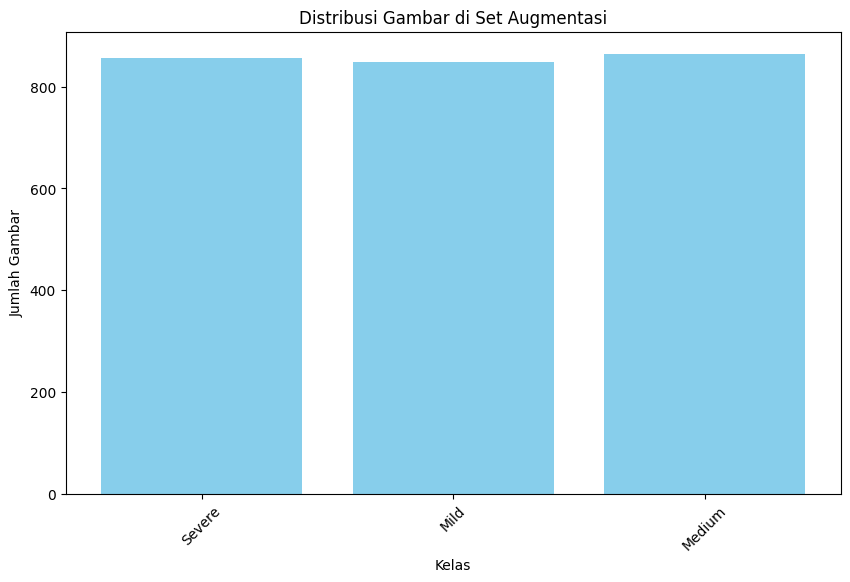

In [ ]:
import os
import matplotlib.pyplot as plt

# Path ke folder hasil augmentasi
augmented_dir = "skin_disease_dataset/skin-disease-datasaet/combined_set_augmented"

# Menghitung jumlah gambar per kelas
class_counts = {}
for class_name in os.listdir(augmented_dir):
    class_folder = os.path.join(augmented_dir, class_name)
    if os.path.isdir(class_folder):
        # Hitung jumlah gambar dalam setiap kelas
        class_counts[class_name] = len([file for file in os.listdir(class_folder) if file.lower().endswith(('jpg', 'jpeg', 'png'))])

# Menampilkan total jumlah gambar di semua kelas
total_images = sum(class_counts.values())
print(f"Total gambar di folder '{augmented_dir}': {total_images}")

# Membuat grafik bar untuk distribusi kelas
plt.figure(figsize=(10, 6))
plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
plt.xlabel('Kelas')
plt.ylabel('Jumlah Gambar')
plt.title('Distribusi Gambar di Set Augmentasi')
plt.xticks(rotation=45)
plt.show()


# **SPLIT DATASETS**

In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Direktori dataset hasil augmentasi
augmented_dir = "skin_disease_dataset/skin-disease-datasaet/combined_set_augmented"

# Direktori output untuk training, validasi, dan test set
output_dir = "skin_disease_dataset/split_dataset"
train_dir = os.path.join(output_dir, "train")
val_dir = os.path.join(output_dir, "val")
test_dir = os.path.join(output_dir, "test")

# Membuat folder output jika belum ada
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Persentase split
train_ratio = 0.7
val_ratio = 0.2
test_ratio = 0.1

# Proses split untuk setiap kelas
for class_name in os.listdir(augmented_dir):
    class_folder = os.path.join(augmented_dir, class_name)
    images = os.listdir(class_folder)

    # Membuat folder untuk setiap kelas di train, val, dan test
    train_class_folder = os.path.join(train_dir, class_name)
    val_class_folder = os.path.join(val_dir, class_name)
    test_class_folder = os.path.join(test_dir, class_name)
    os.makedirs(train_class_folder, exist_ok=True)
    os.makedirs(val_class_folder, exist_ok=True)
    os.makedirs(test_class_folder, exist_ok=True)

    # Split dataset menjadi train, val, dan test
    train_images, temp_images = train_test_split(images, test_size=(1 - train_ratio), random_state=42)
    val_images, test_images = train_test_split(temp_images, test_size=test_ratio / (val_ratio + test_ratio), random_state=42)

    # Memindahkan gambar ke folder masing-masing
    for image_name in train_images:
        shutil.copy(os.path.join(class_folder, image_name), os.path.join(train_class_folder, image_name))

    for image_name in val_images:
        shutil.copy(os.path.join(class_folder, image_name), os.path.join(val_class_folder, image_name))

    for image_name in test_images:
        shutil.copy(os.path.join(class_folder, image_name), os.path.join(test_class_folder, image_name))

print(f"Dataset telah dibagi ke dalam folder:")
print(f" - Training set: {train_dir}")
print(f" - Validation set: {val_dir}")
print(f" - Test set: {test_dir}")


Dataset telah dibagi ke dalam folder:
 - Training set: skin_disease_dataset/split_dataset/train
 - Validation set: skin_disease_dataset/split_dataset/val
 - Test set: skin_disease_dataset/split_dataset/test


# **MODEL**

In [ ]:
# pip show tensorflow keras


In [ ]:
# pip install --upgrade tensorflow


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Path dataset yang sudah dipisah
train_dir = "skin_disease_dataset/split_dataset/train"
val_dir = "skin_disease_dataset/split_dataset/val"
test_dir = "skin_disease_dataset/split_dataset/test"

# Hyperparameter
IMG_SIZE = (224, 224)  # Ukuran input gambar untuk VGG16
BATCH_SIZE = 32
EPOCHS = 20
LEARNING_RATE = 0.0001

# Preprocessing data
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode="nearest",
)

val_test_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False,  # Test set tidak perlu di-shuffle
)

# Load VGG16 pre-trained model tanpa fully connected layer (include_top=False)
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

# Freeze semua lapisan VGG16 agar tidak dilatih ulang
base_model.trainable = False



# # Save model
# model.save("vgg16_skin_disease_model.h5")
# print("Model telah disimpan sebagai vgg16_skin_disease_model.h5")


Found 2068 images belonging to 3 classes.
Found 712 images belonging to 3 classes.
Found 379 images belonging to 3 classes.


In [ ]:
# last_desired_layer2 = base_model.get_layer('block4_pool')
# last_output = last_desired_layer2.output

# print('last layer output shape: ', last_output.shape)

In [ ]:
# Menambahkan lapisan fully connected di atas model2 VGG16
x = Flatten()(base_model.output)
x = Dense(256, activation="relu")(x)
x = Dropout(0.6)(x)


output = Dense(train_generator.num_classes, activation="softmax")(x)

# Membuat model2
model2 = Model(inputs=base_model.input, outputs=output)

# Compile model2
model2.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE),
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)

# Menampilkan ringkasan model2
model2.summary()

# Training model2
history = model2.fit(
    train_generator,
    validation_data=val_generator,
    epochs=30,
    verbose=1,
)

# Evaluasi model2 pada test set
test_loss, test_accuracy = model2.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy:.2f}")

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       6,422,784 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 21,138,243 (80.64 MB)

 Trainable params: 6,423,555 (24.50 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


65/65 ━━━━━━━━━━━━━━━━━━━━ 42s 565ms/step - accuracy: 0.4525 - loss: 1.1628 - val_accuracy: 0.6489 - val_loss: 0.7422
Epoch 2/30
65/65 ━━━━━━━━━━━━━━━━━━━━ 36s 497ms/step - accuracy: 0.5951 - loss: 0.8238 - val_accuracy: 0.6742 - val_loss: 0.6841
Epoch 3/30
65/65 ━━━━━━━━━━━━━━━━━━━━ 33s 467ms/step - accuracy: 0.6369 - loss: 0.7557 - val_accuracy: 0.7079 - val_loss: 0.6457
Epoch 4/30
65/65 ━━━━━━━━━━━━━━━━━━━━ 33s 456ms/step - accuracy: 0.6848 - loss: 0.6998 - val_accuracy: 0.7331 - val_loss: 0.6277
Epoch 5/30
65/65 ━━━━━━━━━━━━━━━━━━━━ 38s 556ms/step - accuracy: 0.7075 - loss: 0.6737 - val_accuracy: 0.6980 - val_loss: 0.6359
Epoch 6/30
65/65 ━━━━━━━━━━━━━━━━━━━━ 36s 466ms/step - accuracy: 0.6995 - loss: 0.6680 - val_accuracy: 0.7317 - val_loss: 0.5893
Epoch 7/30
65/65 ━━━━━━━━━━━━━━━━━━━━ 34s 488ms/step - accuracy: 0.7026 - loss: 0.6600 - val_accuracy: 0.7458 - val_loss: 0.5851
Epoch 8/30
65/65 ━━━━━━━━━━━━━━━━━━━━ 36s 520ms/step - accuracy: 0.7258 - loss: 0.6297 - val_accuracy: 0.744

In [ ]:
model2.export("model_saved")

Saved artifact at 'model_saved'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='keras_tensor_23')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  132748123116944: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132748121907168: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132748121909632: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132748121899952: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132748121913856: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132748121910688: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132748121912800: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132748121913680: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132748121911568: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132748120675904: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132748120678720:

In [ ]:
# saved_model_path = "/content/vgg16_skin_disease_model.h5"

In [ ]:
# # YOUR CODE HERE
# !tensorflowjs_converter --input_format=keras {saved_model_path} ./

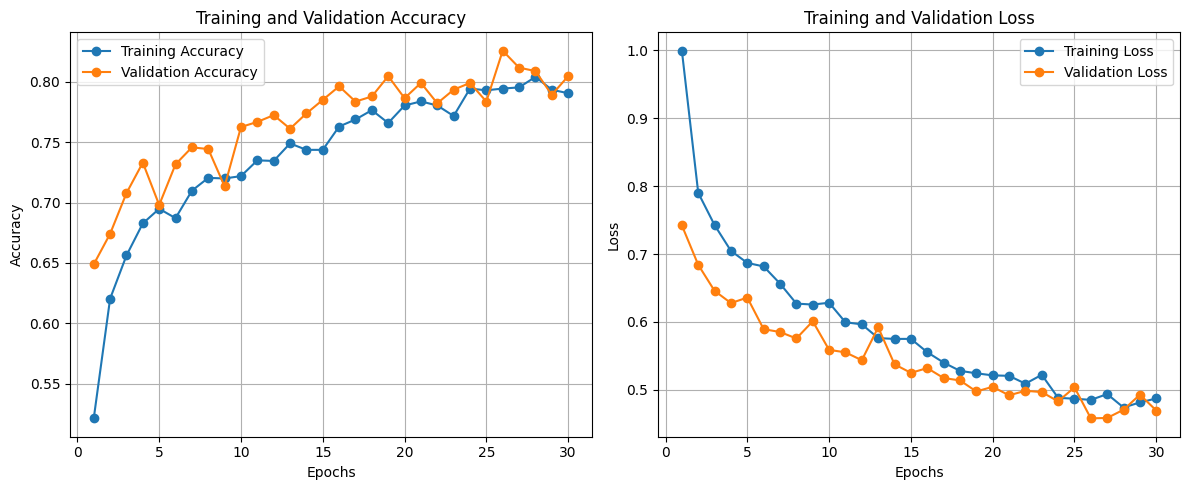

In [ ]:
import matplotlib.pyplot as plt

# Ekstrak data akurasi dan loss dari history
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)

# Plot akurasi
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, accuracy, label="Training Accuracy", marker="o")
plt.plot(epochs, val_accuracy, label="Validation Accuracy", marker="o")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label="Training Loss", marker="o")
plt.plot(epochs, val_loss, label="Validation Loss", marker="o")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()

# Tampilkan grafik
plt.tight_layout()
plt.show()


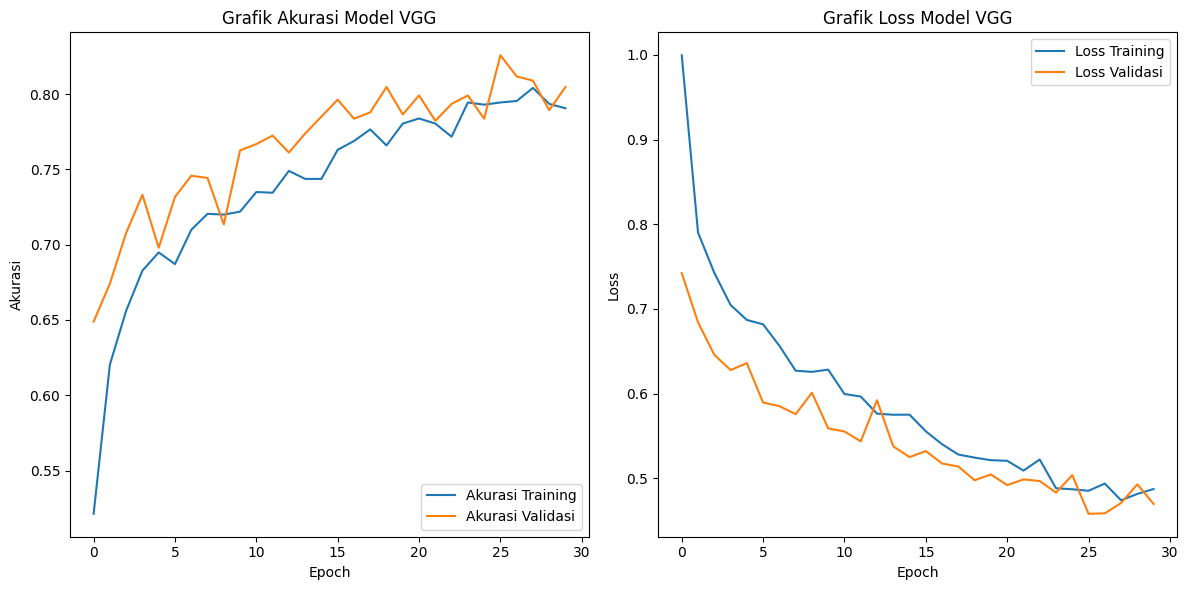

In [ ]:
import matplotlib.pyplot as plt

# Mendapatkan data dari history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

# Membuat grafik Accuracy
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Akurasi Training')
plt.plot(epochs_range, val_acc, label='Akurasi Validasi')
plt.title('Grafik Akurasi Model VGG')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend(loc='lower right')

# Membuat grafik Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Loss Training')
plt.plot(epochs_range, val_loss, label='Loss Validasi')
plt.title('Grafik Loss Model VGG')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

# Menampilkan grafik
plt.tight_layout()
plt.show()


In [ ]:
export_dir = 'simpan_model/2'

# Simpan model dalam format SavedModel
model2.export(export_dir)


Saved artifact at 'simpan_model/2'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='keras_tensor_23')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  132748123116944: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132748121907168: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132748121909632: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132748121899952: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132748121913856: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132748121910688: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132748121912800: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132748121913680: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132748121911568: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132748120675904: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1327481206787

In [ ]:
# export_dir = 'saved_model/2'

# # YOUR CODE HERE
# tf.saved_model.save(model2, export_dir)

In [ ]:
# # Select mode of optimization
# mode = "Speed"

# if mode == 'Storage':
#     optimization = tf.lite.Optimize.OPTIMIZE_FOR_SIZE
# elif mode == 'Speed':
#     optimization = tf.lite.Optimize.OPTIMIZE_FOR_LATENCY
# else:
#     optimization = tf.lite.Optimize.DEFAULT

In [ ]:
# converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)

# # Set the optimzations
# converter.optimizations = [optimization]

# # Invoke the converter to finally generate the TFLite model
# tflite_model = converter.convert()

In [ ]:
# import pathlib

In [ ]:
# tflite_model_file = pathlib.Path('./model.tflite')
# tflite_model_file.write_bytes(tflite_model)

In [ ]:
# model2.save("modelkeparahan_vgg.h5")

In [ ]:
# !zip -r model.zip /content/model_saved



In [ ]:
# from google.colab import files
# files.download('model.zip')


In [ ]:
# model2.trainable = False  # Matikan pelatihan ulang
# tf.saved_model.save(model2, "simpan/1")  # Simpan sebagai SavedModel


In [ ]:
import tensorflow as tf

# Konversi dari SavedModel ke TFLite
converter = tf.lite.TFLiteConverter.from_saved_model("simpan_model/2")
converter.optimizations = [tf.lite.Optimize.DEFAULT]  # Opsional: optimasi
tflite_model = converter.convert()

# Simpan model TFLite
with open("model_frozen.tflite", "wb") as f:
    f.write(tflite_model)


In [ ]:
interpreter = tf.lite.Interpreter(model_path="model_frozen.tflite")
interpreter.allocate_tensors()

# Cek detail input dan output
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

print("Input details:", input_details)
print("Output details:", output_details)


Input details: [{'name': 'serving_default_keras_tensor_23:0', 'index': 0, 'shape': array([  1, 224, 224,   3], dtype=int32), 'shape_signature': array([ -1, 224, 224,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
Output details: [{'name': 'StatefulPartitionedCall_1:0', 'index': 53, 'shape': array([1, 3], dtype=int32), 'shape_signature': array([-1,  3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [ ]:
def preprocess_image(image_path, input_shape):
    # Muat gambar
    image = Image.open(image_path).convert("RGB")

    # Ubah ukuran gambar sesuai input model
    image = image.resize((input_shape[1], input_shape[2]))

    # Konversi ke numpy array dan normalisasi
    image_array = np.array(image).astype(np.float32) / 255.0  # Normalisasi ke [0, 1]

    # Tambahkan batch dimension
    return np.expand_dims(image_array, axis=0)


In [ ]:
# Path ke gambar
image_path = "/content/acne-closed-comedo-26.jpg"

# Pra-pemrosesan gambar
input_shape = input_details[0]['shape']
input_data = preprocess_image(image_path, input_shape)

# Atur input tensor
interpreter.set_tensor(input_details[0]['index'], input_data)

# Jalankan model
interpreter.invoke()

# Ambil hasil prediksi
output_data = interpreter.get_tensor(output_details[0]['index'])

# Tampilkan hasil
print("Output prediksi (probabilitas):", output_data)


Output prediksi (probabilitas): [[0.29869443 0.68545544 0.01585013]]


In [ ]:
# Daftar label kelas
class_labels = ["Class 1", "Class 2", "Class 3"]

# Cari kelas dengan probabilitas tertinggi
predicted_class = np.argmax(output_data[0])
predicted_prob = output_data[0][predicted_class]

print(f"Prediksi: {class_labels[predicted_class]} dengan probabilitas {predicted_prob:.2f}")


Prediksi: Class 2 dengan probabilitas 0.69
